In [15]:
import ugradio
import ugradio.coord
import astropy.coordinates
import astropy.time
import time
import numpy as np
import matplotlib.pylab as plt
import inspect
import collections
from scipy.interpolate import interp1d
# import emcee

In [16]:
samp_freq = 500 * 1000 * 1000 # Hz

fname = f'../combined_data/sun/full_day_sun_740am.npy'
data = np.load(fname, allow_pickle=True).tolist()
all_data = {}
for k in data[0].keys():
    all_data[k] = [d.get(k) for d in data]

In [78]:
total_duration = (data[-1]['time']-data[0]['time'])/60
print(total_duration)

438.8556294997533


In [81]:
print(str((all_data['time'][-1] - all_data['time'][0])/60) + ' min')

438.8556294997533 min


In [19]:
def fft(data, num_samp=1024, samp_rate=samp_freq):
    f = np.fft.fftshift(np.fft.fftfreq(num_samp, 1/samp_rate))
    Fx = np.fft.fftshift(np.fft.fft(data))
    return f, Fx

In [20]:
def t1():
    raw_data = np.array([dictionary['corr01'] for dictionary in data])
    result = []
    for point in raw_data:
        f, Fx = fft(point)
        plt.plot(f * 10**-9, np.abs(Fx)**2)
        result += [f[np.argwhere(Fx == np.max(Fx))]]
        # break
    plt.xlabel('Time Delay [nanosec]')
    plt.ylabel('Power')
    # plt.xlim(-.004,.004)
    plt.title('Single Block Power Spectrum')

# Visibility

(12500, 12000)

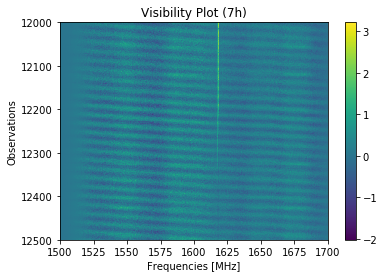

In [66]:
adj_data = all_data['corr01'] - np.average(all_data['corr01'], axis=0)
freqs = np.fft.fftshift(np.fft.fftfreq(1024, 1/500)) + 1540
plt.imshow(adj_data.real, aspect='auto', extent=[freqs[0], freqs[-1], len(adj_data), 0])
plt.colorbar()
plt.title('Visibility Plot (7h)')
plt.xlabel('Frequencies [MHz]')
plt.ylabel('Observations')
plt.xlim(1500, 1700)
plt.ylim(12500, 12000)

In [ ]:
# np.fft.fftshift(x, axes=[1])

# fft of the data

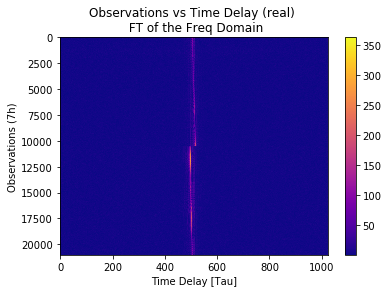

In [68]:
ftfreq = np.fft.fftshift(np.fft.fft(adj_data, axis=1))
ffreq2 = np.fft.fft(all_data['corr01'], axis=1)

plt.figure()
plt.imshow(np.abs(ftfreq), aspect='auto', cmap='plasma')
plt.xlabel('Time Delay [Tau]')
plt.ylabel('Observations (7h)')
plt.title('Observations vs Time Delay (real) \n FT of the Freq Domain')
plt.colorbar()
# plt.xlim(450, 550)
# plt.ylim(12500, 10000)
plt.show()

# NOT airy ring
airy ring = ring of the sun

fft2 of the data


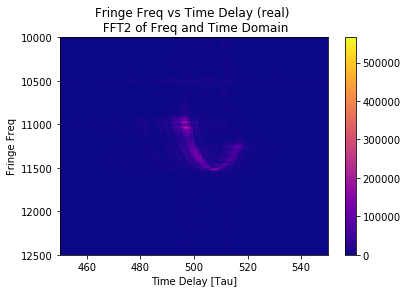

In [56]:
ftfreq = np.fft.fftshift(np.fft.fft2(adj_data))
ffreq2 = np.fft.fft(all_data['corr01'], axis=1)

plt.figure()
plt.imshow(np.abs(ftfreq), aspect='auto', cmap='plasma')
plt.xlabel('Time Delay [Tau]')
plt.ylabel('Fringe Freq')
plt.title('Fringe Freq vs Time Delay (real) \n FFT2 of Freq and Time Domain')
plt.colorbar()
plt.xlim(450, 550)
plt.ylim(12500, 10000)
plt.show()

# something

plotting the power (after FT) of a given freq slice

what r the x and y axes?

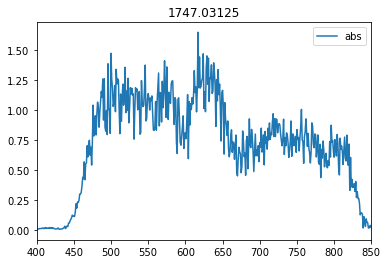

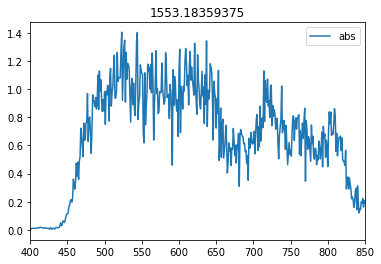

In [85]:
# attempt to create the sin func on the board in a single freq channel

def plot2():
    result = []
    for f in sorted(np.random.choice(freqs, size=1)):
        Y = adj_data[np.argwhere(freqs <= f)[-1, 0]]
        result = np.append(result, Y)
        plt.title(f'{str(f)}')
        plt.plot(np.abs(Y), label=f'abs')
        plt.plot(Y.real, label=f'real')
        plt.plot(Y.imag, label=f'imag')
    plt.xlim(400, 850) 
    plt.legend()
    plt.show()
    return result
_ = plot2()
_ = plot2()

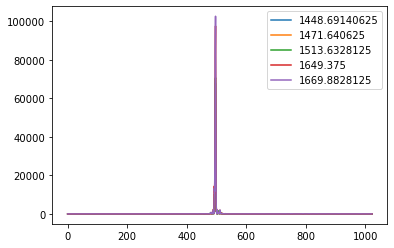

In [31]:
def plot1():
    result = []
    for f in sorted(np.random.choice(freqs, 5)):
        Fx = np.fft.fftshift(np.fft.fft(adj_data[np.argwhere(freqs <= f)[-1][0]]))
        result = np.append(result, Fx)
        plt.plot(np.abs(Fx)**2, label=str(f))
        # break
    plt.legend()
    return result
_ = plot1()